## Кластеризация.
### Данные
В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:

geo_comment.xlsx
comment - комментарий одного или списка жителей к проект
multiplier - количество авторов комментария (может быть 1, может быть список)
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)
geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть multiplier > 1 голоса)
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)
### Обязательное задание
визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
аналогично исследовать скопления голосов за и против отдельно
подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
приложить ноутбук
### Дополнительные задания
найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')
для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

## Загружаем библиотеки и считываем данные

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

In [2]:
geo = pd.read_excel('/Users/mariashemyakina/Downloads/geo.xlsx')


In [3]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
Unnamed: 0       108806 non-null int64
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


In [4]:
geo.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [5]:
geo.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [7]:
geo_comment = pd.read_excel('/Users/mariashemyakina/Downloads/geo_comment.xlsx')

In [8]:
geo_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70382 entries, 0 to 70381
Data columns (total 6 columns):
Unnamed: 0       70382 non-null int64
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ MB


In [9]:
geo_comment.drop('Unnamed: 0', axis=1, inplace=True)



In [10]:
geo_comment.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [11]:
geo_comment.sample(5)

,x,y,comment_class,multiplier,comment
70120,37.540533,55.689781,-1,1,В соответствии с п.п. «б» п. 23.1 ч. 1 ст. 8 З...
39342,37.683949,55.750884,-1,1,"Мы, жители района Лефортово, категорически воз..."
9626,37.442095,55.883792,-1,1,Я против утверждения проекта Правил землепольз...
58649,37.420356,55.854911,1,1,"Проживаю по адресу: г. Москва, ул. Туристская,..."
6569,37.569342,55.819252,-1,1,ПРЕДЛАГАЮ ОТКЛОНИТЬ ОТ РАССМОТРЕНИЯ В СВЯЗИ С ...


In [12]:
X = np.array(geo[['x', 'y']])
y = np.array(geo['comment_class'])

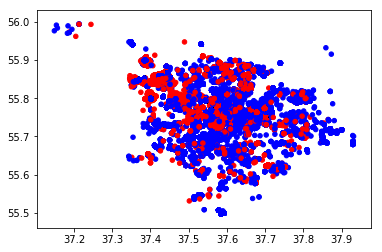

In [13]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'bwr',  s = 20)

Проведем кластеризацию безотносительно голосов

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo)
geo_scaled=pd.DataFrame(geo_scaled, columns=geo.columns)

/Users/mariashemyakina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/mariashemyakina/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
geo_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null float64
dtypes: float64(3)
memory usage: 2.5 MB


In [17]:
geo_scaled.head()

,x,y,comment_class
0,0.367919,0.159553,-0.378889
1,0.367919,0.159553,-0.378889
2,0.293178,-0.348131,-0.378889
3,-0.073819,-0.539880,-0.378889
4,-0.009022,-0.496273,-0.378889


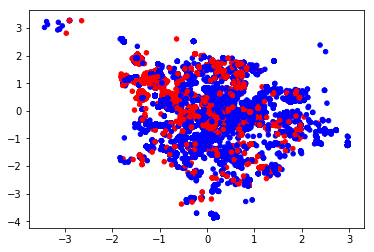

In [18]:
plt.scatter(geo_scaled['x'], geo_scaled['y'], c=geo_scaled['comment_class'], cmap='bwr', s=20)



In [19]:
from sklearn.cluster import KMeans

In [20]:
alg = KMeans(n_clusters = 12)

In [21]:
clusters = alg.fit_predict(geo_scaled)

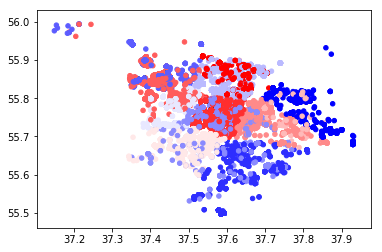

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

### Разделим наши данные на тех, кто голосовал "За" и тех, кто "Против" (1 и -1 соответственно)

In [23]:
X = np.array(geo[['x', 'y']][geo['comment_class'] == 1])

In [24]:
X_scaled = scaler.fit_transform(X)

In [25]:
clusters = alg.fit_predict(X_scaled)

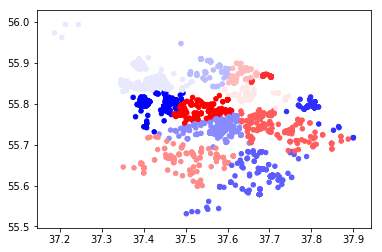

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

In [27]:
X = np.array(geo[['x', 'y']][geo['comment_class'] == -1])

In [28]:
X_scaled = scaler.fit_transform(X)

In [29]:
clusters = alg.fit_predict(X_scaled)

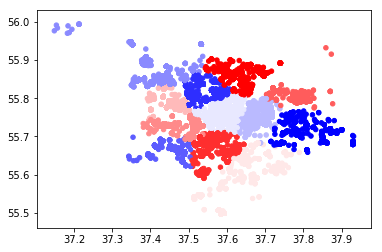

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

Как видим, против проголосовало больше народа

### Подоберем оптимальное число кластеров

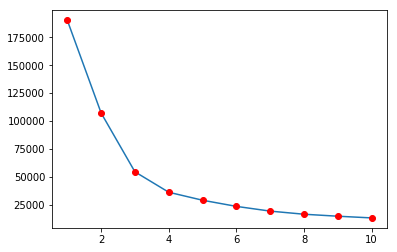

In [31]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

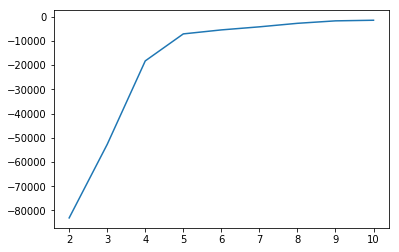

In [32]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

In [33]:
diff_r = diff[1:] / diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
print('Оптимально число кластеров:', k_opt)

Оптимально число кластеров: 3


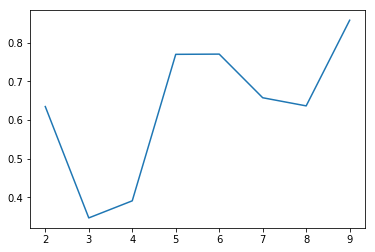

In [34]:
plt.plot(ks[1:-1],diff_r)

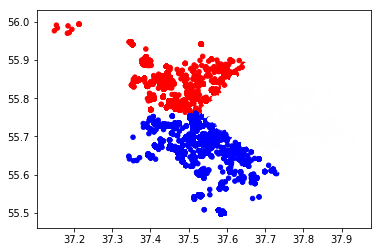

In [35]:
alg = KMeans(n_clusters=3)
clusters = alg.fit_predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='bwr', s=20)

In [36]:
import scipy as sp
import nltk
from nltk import *
from nltk.corpus import brown
nltk.download('stopwords')
stopwords= nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariashemyakina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
print(stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [38]:
class LSI(object):
	def __init__(self, stopwords, ignorechars, docs):
		self.wdict = {}
		self.dictionary = []
		self.stopwords = stopwords
		if type(ignorechars) == str: ignorechars = ignorechars.encode('utf-8')
		self.ignorechars = ignorechars
		for doc in docs: self.add_doc(doc)

	def prepare(self):
		self.build()
		self.calc()

	def dic(self, word, add = False):
		if type(word) == str: word = word.encode('utf-8')
		word = word.lower().translate(None, self.ignorechars)
		word = word.decode('utf-8')
		word = stemmer.stem(word)
		if word in self.dictionary: return self.dictionary.index(word)
		else:
			if add:
				self.dictionary.append(word)
				return len(self.dictionary) - 1
			else: return None

	def add_doc(self, doc):
		words = [self.dic(word, True) for word in doc.lower().split()]
		self.docs.append(words)
		for word in words:
			if word in self.stopwords:  continue
			elif word in self.wdict:   self.wdict[word].append(len(self.docs) - 1)
			else:                      self.wdict[word] = [len(self.docs) - 1]

	def build(self):
		self.keys = [k for k in self.wdict.keys() if len(self.wdict[k]) > 0]
		self.keys.sort()
		self.A = zeros([len(self.keys), len(self.docs)])
		for i, k in enumerate(self.keys):
			for d in self.wdict[k]:
				self.A[i,d] += 1

	def calc(self):
		self.U, self.S, self.Vt = svd(self.A)

	def TFIDF(self):
		wordsPerDoc = sum(self.A, axis=0)
		docsPerWord = sum(asarray(self.A > 0, 'i'), axis=1)
		rows, cols = self.A.shape
		for i in range(rows):
			for j in range(cols):
				self.A[i,j] = (self.A[i,j] / wordsPerDoc[j]) * log(float(cols) / docsPerWord[i])

	def dump_src(self):
		self.prepare()
		print ('Здесь представлен расчет матрицы ')
		for i, row in enumerate(self.A):
			print (self.dictionary[i], row)

	def print_svd(self):
		self.prepare()
		print ('Здесь сингулярные значения')
		print (self.S)
		print ('Здесь первые 3 колонки U матрица ')
		for i, row in enumerate(self.U):
			print (self.dictionary[self.keys[i]], row[0:3])
		print ('Здесь первые 3 строчки Vt матрица')
		print (-1*self.Vt[0:3, :])

	def find(self, word):
		self.prepare()
		idx = self.dic(word)
		if not idx:
			print ('слово невстерчается')
			return []
		if not idx in self.keys:
			print ('слово отброшено как не имеющее значения которое через stopwords')
			return []
		idx = self.keys.index(idx)
		print ('word --- ', word, '=', self.dictionary[self.keys[idx]], '.\n')
		# получаем координаты слова
		wx, wy = (-1 * self.U[:, 1:3])[idx]
		print ('word {}\t{:0.2f}\t{:0.2f}\t{}\n'.format(idx, wx, wy, word))
		arts = []
		xx, yy = -1 * self.Vt[1:3, :]
		for k, v in enumerate(self.docs):
			ax, ay = xx[k], yy[k]
			dx, dy = float(wx - ax), float(wy - ay)
			arts.append((k, v, ax, ay, sqrt(dx * dx + dy * dy)))
		return sorted(arts, key = lambda a: a[4])

In [39]:
docs = geo_comment['comment'].unique()

In [40]:
docs

array(['Во все разделы правил землепользования и застройки г.Москвы (текстовые части и\xa0графические схемы) необходимо внести изменения по земельному участку с кадастровым\xa0номером 77:01:0004002:188 с адресом первый Самотёчный пер., вл. 17Б (в ПЗЗ\xa0территориальная зона №2034561) и исключить из этого земельного участка часть моей\xa0общей долевой собственности - земельного участка многоквартирного дома 17А по 1-му\xa0Самотёчному пер. площадью 650,5 кв.м с точками 1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-1 с\xa0координатами: 12316.39 и 6983.68; 123224 6988.91; 12316,45 и 7009,60; 12328.04 и\xa07013.46;12327.73 и 7014.41; 12330.06 и 7015.18; 12330.37 и 7014.24; 12335.17 и 7015.83;\xa012330.82 и 7028.61; 12304.74 и 7021.28; 12302.02 и 7012.47; 12303.22 и 7005.49; 12297.24 и\xa07004.18; 12297ю96 и 7000.60; 12311.23 и 7003.64; 12316.39 и 6983.68. - На основании\xa0вступившего в законную силу судебного решения по делу № А40-51937/2011 от 11.06.2015 о\xa0ничтожности заключённого 18.06.2007 

In [41]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
 


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariashemyakina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
stem = 'russian'

In [42]:
ignorechars = ''',:'!'''
word = "проект"
lsa = LSI([], ignorechars, docs)
lsa.build()
lsa.dump_src()
lsa.calc()
lsa.print_svd()

for res in lsa.find(word):
	print (res[0], res[4], res[1], docs[res[0]])

NameError: name 'stemmer' is not defined

In [43]:
lsa.dump_src()

NameError: name 'lsa' is not defined